In [103]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn import metrics

In [104]:
data = pd.read_csv("../Data Sets/cali_housing.csv")
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


<AxesSubplot:>

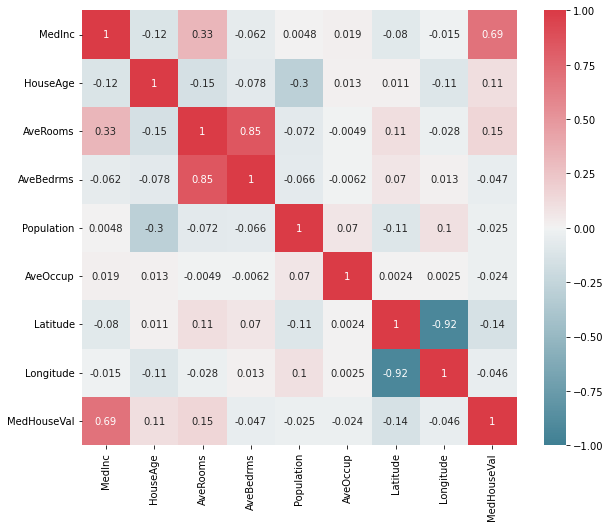

In [105]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax, annot=True)

In [106]:
X = data[['MedInc','HouseAge','AveRooms']]
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X.isna().sum(), y.isna().sum()

(MedInc      0
 HouseAge    0
 AveRooms    0
 dtype: int64,
 0)

In [107]:
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [108]:
print(metrics.mean_squared_error(y_train, regressor.predict(X_train)))
print(metrics.mean_squared_error(y_test, regressor.predict(X_test)))

5.451128227090446e-32
1.1046835112650435


In [109]:
regressor = tree.DecisionTreeRegressor(criterion='squared_error', min_samples_split=10)
regressor.fit(X_train, y_train)
print(metrics.mean_squared_error(y_train, regressor.predict(X_train)))
print(metrics.mean_squared_error(y_test, regressor.predict(X_test)))

0.2016903626883052
0.8646817107783429


In [110]:
dtr_gscv = GridSearchCV(tree.DecisionTreeRegressor(), 
             param_grid = {"min_samples_split": np.arange(5, 25), 
                           "max_depth": np.arange(1,10), 
                           "min_samples_leaf": np.arange(1,10)})

dtr_gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])})

In [111]:
dtr_gscv.best_params_

{'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 23}

In [112]:
regressor = tree.DecisionTreeRegressor(min_samples_split=23, min_samples_leaf=8,max_depth=7)
regressor.fit(X_train, y_train)
print(metrics.mean_squared_error(y_train, regressor.predict(X_train)))
print(metrics.mean_squared_error(y_test, regressor.predict(X_test)))

0.509576634315243
0.5802186926513355


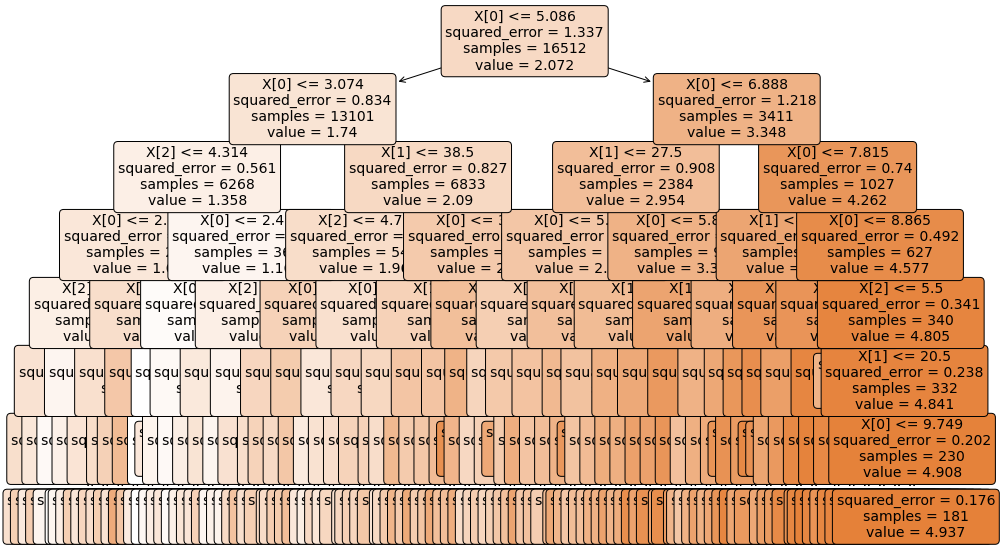

In [129]:
plt.figure(figsize=(15,10))

tree.plot_tree(regressor,
               filled=True, 
               rounded=True,
               fontsize=14);

Median Income, which is `(X[0])`, is the most important feature. This was also apparent in the correlation heat map.

In [128]:
new_predict = np.array(X.mean()).reshape(1,-1)
print(regressor.predict(new_predict))
print(y.mean())

[1.67551887]
2.068558169089147


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
